# Goal
* Learn Data Cleaning
* Learn EDA
* Learn Statistcal Test
* Learn Linear Regression


# Data contains
* TV promotion budget (in million)
* Social Media promotion budget (in million)
* Radio promotion budget (in million)
* Influencer: Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer 
* Sales (in million)

# Latar Belakang

Perusahaan ingin mengetahui promosi apa yang paling harus difokuskan dan Influrncer mana yang paling menghasilkan sales paling banyak.  Maka dari itu kita akan mencoba mealakukan uji hipotesis dan juga membuat model regresi linear untuk mengetahui  bagaimana hubungan promosi TV, Radio, Media Sosial dan Influencer terhadap Sales.

Objektif : 
1. Bagaimana analisis eksplorasi datanya?
    * Apa yang ditemukan dari hasil eksplorasi dan bagaimana uji hipotesisnya?
2. Bagaimana hasil dari pembuatan model regresi-nya?


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv(r'C:\Users\User\Downloads\Dummy Data HSS.csv')

# Data Cleaning

In [4]:
dataset.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
dataset.shape

(4572, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


## Cek Data Duplikat

In [7]:
# cek data duplikat
dataset.duplicated().sum()

0

Dataset tidak memiliki data duplikat

## Cek Missing Values

In [8]:
# cek missing values
dataset.isna().sum().sort_values(ascending=False)

TV              10
Social Media     6
Sales            6
Radio            4
Influencer       0
dtype: int64

<AxesSubplot:xlabel='TV', ylabel='Density'>

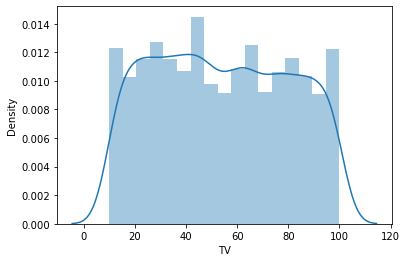

In [ ]:
# mengecek distribusi
sns.distplot(dataset['TV'])

<AxesSubplot:xlabel='Social Media', ylabel='Density'>

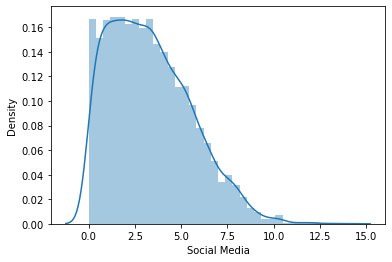

In [ ]:
sns.distplot(dataset['Social Media'])

<AxesSubplot:xlabel='Radio', ylabel='Density'>

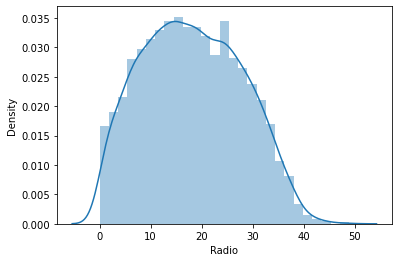

In [ ]:
sns.distplot(dataset['Radio'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

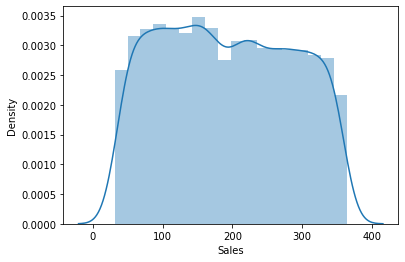

In [ ]:
sns.distplot(dataset['Sales'])

Kita bisa mengisi missing value dengan mean pada kolom TV, Radio dan Sales karena distribusinya cenderung normal. Berbeda dengan kolom Social Media yang cenderung berdistribusi skewed lebih baik mengisi missing value dengan median.

In [13]:
# Mengisi missing values
dataset['TV'] = dataset['TV'].fillna(dataset['TV'].mean())
dataset['Radio'] = dataset['Radio'].fillna(dataset['Radio'].mean())
dataset['Sales'] = dataset['Sales'].fillna(dataset['Sales'].mean())
dataset['Social Media'] = dataset['Social Media'].fillna(dataset['Social Media'].median())

In [14]:
dataset.isna().sum().sort_values(ascending=False)

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

## Cek Outlier

In [16]:
inf = dataset['Influencer'].unique()
print(inf)

['Mega' 'Micro' 'Nano' 'Macro']


In [17]:
df_plot = dataset.select_dtypes(include=['float','int'])

TV                 AxesSubplot(0.125,0.536818;0.352273x0.343182)
Radio           AxesSubplot(0.547727,0.536818;0.352273x0.343182)
Social Media          AxesSubplot(0.125,0.125;0.352273x0.343182)
Sales              AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

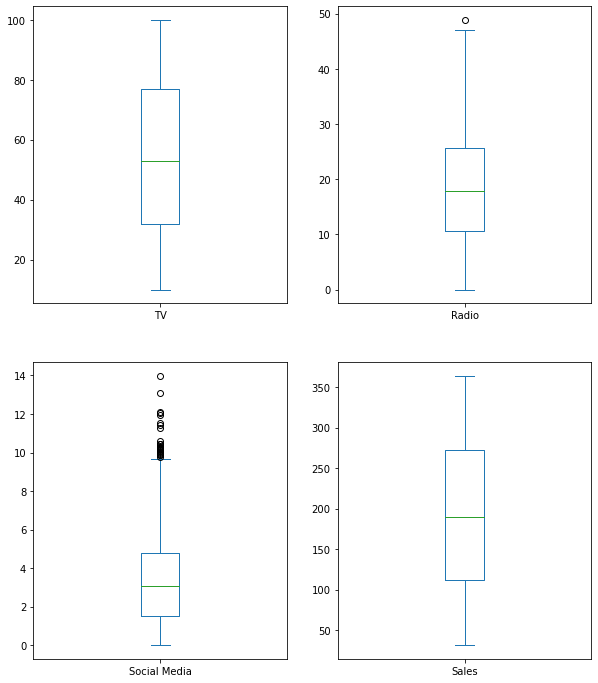

In [18]:
df_plot.plot(subplots=True, layout=(2,2), kind='box', figsize=(10,12))

# Exploratory Data Analysis

In [20]:
dataset.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [241]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social_Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


## TV, Radio, Social Media & Sales

### Statistik Deskriptif

In [23]:
dataset.describe()

,TV,Radio,Social Media,Sales
count,4572.000000,4572.000000,4572.000000,4572.000000
mean,54.066857,18.160356,3.323604,192.466602
std,26.096461,9.672723,2.211239,93.071947
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.546519,1.529879,112.397660
50%,53.000000,17.875181,3.055565,189.632530
75%,77.000000,25.647476,4.805832,272.414914
max,100.000000,48.871161,13.981662,364.079751


In [383]:
barchart = dataset[['TV','Radio','Social_Media']].sum()

Text(0, 0.5, 'Budget')

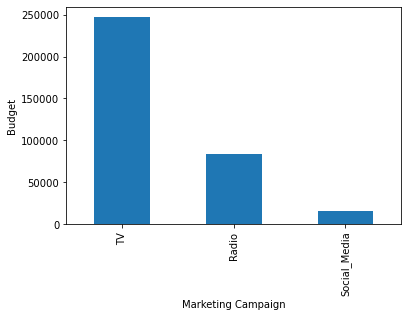

In [385]:
barchart.plot(kind='bar')
plt.xlabel("Marketing Campaign")
plt.ylabel("Budget")

Dapat dilihat bahwa budget yang di anggarkan pada promosi TV yang sangat besar.

### Korelasi

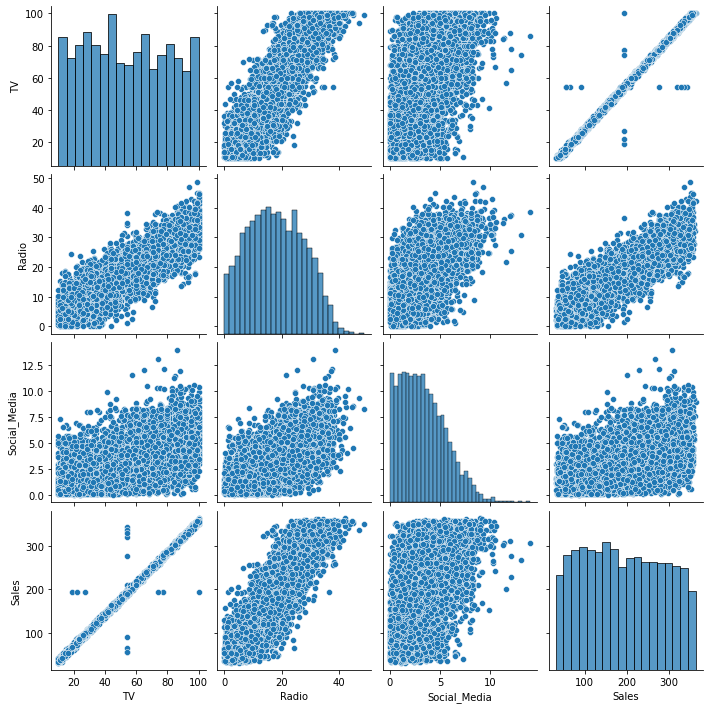

In [165]:
sns.pairplot(dataset)

* Berdasarkan plot TV dan Sales dapat ditarik kesimpulan bahwa Sales akan terus meningkat seiring dengan meningkatnya anggaran promosi TV. Hal ini menunjukan bahwa terdapat korelasi yang positif antara Sales dan marketing campaign di TV.
* Radio terlihat memiliki korelasi yang positif juga namun tidak sebaik dengan TV.
* Campaign marketing Social Media membutuhkan improvement. Hal ini bisa dilihat dari plotnya terlalu menyebar yang menunjukan rendahnya korelasi dengan Sales.

## Influencer

In [27]:
dataset.Influencer.unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

<AxesSubplot:xlabel='Influencer', ylabel='count'>

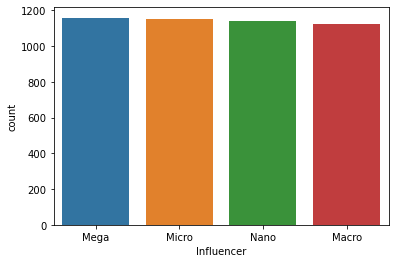

In [28]:
sns.countplot(data=dataset, x='Influencer')

In [29]:
grouped = dataset.groupby('Influencer')
counts = grouped.count()
print(counts)

              TV  Radio  Social Media  Sales
Influencer                                  
Macro       1122   1122          1122   1122
Mega        1158   1158          1158   1158
Micro       1153   1153          1153   1153
Nano        1139   1139          1139   1139


                   TV      Radio  Social Media       Sales
Influencer                                                
Macro       55.043079  18.321783      3.368334  195.610796
Mega        53.500979  18.076145      3.373120  190.596901
Micro       53.848338  18.230509      3.273273  191.809665
Nano        53.901727  18.015939      3.280150  191.935238


<AxesSubplot:xlabel='Influencer'>

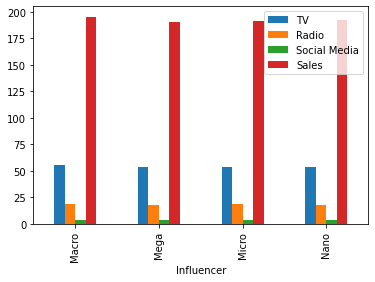

In [31]:
mean1 = grouped.mean()
print(mean1)
mean1.plot(kind='bar')

### Kesimpulan
Setiap Influencer terlihat memiliki nilai yang mirip, tetapi Influencer macro menunjukan rata-rata sales tertinggi. Akan dilakukan uji hipotesis 

In [102]:
dataset_dummy=pd.get_dummies(dataset['Influencer'])
dataset_dummy=pd.concat([dataset,dataset_dummy], axis=1)
dataset_dummy

,TV,Radio,Social_Media,Influencer,Sales,Macro,Mega,Micro,Nano
0,16.0,6.566231,2.907983,Mega,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,Mega,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,Mega,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,Mega,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,Micro,56.594181,0,0,1,0
...,...,...,...,...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866,0,0,1,0
4568,71.0,20.610685,6.545573,Nano,249.101915,0,0,0,1
4569,44.0,19.800072,5.096192,Micro,163.631457,0,0,1,0
4570,71.0,17.534640,1.940873,Macro,253.610411,1,0,0,0


# Statistical Test

In [372]:
from statsmodels.stats.weightstats import ttest_ind
from scipy import stats

In [358]:
Macro = dataset[dataset['Influencer']=='Macro']['Sales']
Micro = dataset[dataset['Influencer']=='Micro']['Sales']
Nano = dataset[dataset['Influencer']=='Nano']['Sales']
Mega = dataset[dataset['Influencer']=='Mega']['Sales']

In [365]:
macro = Macro.values
micro = Micro.values
nano = Nano.values
mega = Mega.values

np.var(macro), np.var(micro), np.var(nano), np.var(mega)

(8554.68622905221, 8876.702264719248, 8696.47256152983, 8498.562545579998)

## Perbandingan Antara Influencer Macro dan Micro
    H0 : Influencer Macro dan Micro sama-sama menghasilkan rata-rata sales yang sama
    H1 : Influencer Macro memiliki rata-rata sales yang lebih besar dari Influencer Micro

In [366]:
t_stat1, p_value1 = stats.ttest_ind(a = macro, b = micro, equal_var=False,
                            alternative = 'greater')
print(f"t stats : {t_stat1:.4f}")
print(f"p-value : {p_value1:.4f}")

t stats : 0.9706
p-value : 0.1659


In [377]:
if p_value1<0.05:
    print("Tolak H0")
else:
    print("Gagal Tolak H0")

Gagal Tolak H0


## Perbandingan Antara Influencer Macro dan Nano
    H0 : Influencer Macro dan Nano sama-sama menghasilkan rata-rata sales yang sama
    H1 : Influencer Macro memiliki rata-rata sales yang lebih besar dari Influencer Nano

In [367]:
t_stat2, p_value2 = stats.ttest_ind(a = macro, b = nano, equal_var=False,
                            alternative = 'greater')
print(f"t stats : {t_stat2:.4f}")
print(f"p-value : {p_value2:.4f}")

t stats : 0.9405
p-value : 0.1735


In [ ]:
if p_value2<0.05:
    print("Tolak H0")
else:
    print("Gagal Tolak H0")

## Perbandingan Antara Influencer Macro dan Mega

    H0 : Influencer Macro dan Mega sama-sama menghasilkan rata-rata sales yang sama
    H1 : Influencer Macro memiliki rata-rata sales yang lebih besar dari Influencer Mega

In [368]:
t_stat3, p_value3 = stats.ttest_ind(a = macro, b = mega, equal_var=False,
                            alternative = 'greater')
print(f"t stats : {t_stat3:.4f}")
print(f"p-value : {p_value3:.4f}")

t stats : 1.2956
p-value : 0.0976


In [378]:
if p_value3<0.05:
    print("Tolak H0")
else:
    print("Gagal Tolak H0")

Gagal Tolak H0


## Kesimpulan
* Berdasarkan uji hipotesis dan p-value, kita gagal menolak hipotesis nol.
* yang berarti tidak cukup evidence untuk membuktikan influencer Macro memiliki rata-rata sales yang lebih besar dari Influencer lainnya.

# Regresi

In [178]:
from sklearn.metrics import r2_score

In [179]:
dataset_dummy=pd.get_dummies(dataset['Influencer'])
dataset_dummy=pd.concat([dataset,dataset_dummy], axis=1)
dataset_dummy=dataset_dummy.drop('Influencer', axis=1)
dataset_dummy.head()

,TV,Radio,Social_Media,Sales,Macro,Mega,Micro,Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0


In [180]:
import statsmodels.formula.api as smf

In [187]:
# Create OLS model object
model = smf.ols("Sales ~ TV + Radio + Social_Media + Macro + Mega + Micro + Nano", dataset_dummy)

# Fit the model
results_model = model.fit()
ypred = results_model.predict(dataset_dummy[["TV", "Radio", "Social_Media", "Macro", "Mega", "Micro", "Nano"]])
# Extract the results (Coefficient and Standard Error) to DataFrame
results= print_coef_std_err(results_model_weight)

In [198]:
results_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.139e+05
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:50:59   Log-Likelihood:                -15748.
No. Observations:                4572   AIC:                         3.151e+04
Df Residuals:                    4565   BIC:                         3.155e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1019      0.211      0.483      0.629      -0.312       0.516
TV               3.5128      0.009    407.126      0.000       3.496       3.530
Radio            0.1226      0.025      4.928      0.000       0.074       0.171
Social_Media     0.0560      0.064      0.877      0.381      -0.069       0.181
Macro           -0.2799      0.204     -1.373      0.170      -0.679       0.120
Mega             0.1531      0.200      0.765      0.444      -0.239       0.545
Micro            0.1324      0.200      0.660      0.509      -0.261       0.525
Nano             0.0963      0.201      0.478      0.632      -0.298       0.491
==============================================================================
Omnibus:                     2773.881   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11682234.293
Skew:                           1.146   Prob(JB):                         0.00
Kurtosis:                     250.626   Cond. No.                     2.99e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.06e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## F-test & t-test

f-test dan t-test digunakan untuk menguji hipotesis apakah model yang kita buat itu berguna atau tidak dan juga menguji apakah setiap variabel prediktor memiliki pengaruh yang signifikan terhadap variabel outcome.

1. F-test (α = 0.05)
$$
H_0 : \beta_1 = \beta_2 = \ldots = \beta_p = 0 \\
H_1 : At \space least \space 1 \space \beta_i \ne 0 \\
$$
Berdasarkan tabel summary sebelumnya menunjukan p-value < α yang berarti kita bisa menolak hipotesis nol. 

2. t-test (α = 0.05)
$$
H_0 : \beta_i = 0 \\
H_1 : \beta_i \ne 0 \\
$$
Berdasarkan tabel summary menunjukan bahwa p-value variabel Social_Media, Macro, Mega, Micro dan  Nano lebih besar dari α yang berarti bahwa variabel tersebut harus kita remove karena tidak signifikan secara statistik.

## 2nd Regresi

In [206]:
model2 = smf.ols("Sales ~ TV + Radio", dataset_dummy)
results_model2 = model2.fit()
ypred2 = results_model2.predict(dataset_dummy[["TV", "Radio"]])
# Extract the results (Coefficient and Standard Error) to DataFrame
results2= print_coef_std_err(results_model_weight)

In [208]:
results_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 3.419e+05
Date:                Sat, 15 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:59:59   Log-Likelihood:                -15749.
No. Observations:                4572   AIC:                         3.150e+04
Df Residuals:                    4569   BIC:                         3.152e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1816      0.259      0.702      0.483      -0.326       0.689
TV             3.5124      0.009    407.321      0.000       3.495       3.529
Radio          0.1311      0.023      5.634      0.000       0.085       0.177
==============================================================================
Omnibus:                     2760.545   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11724502.855
Skew:                           1.129   Prob(JB):                         0.00
Kurtosis:                     251.074   Cond. No.                         146.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Uji Asumsi

### Independence of error

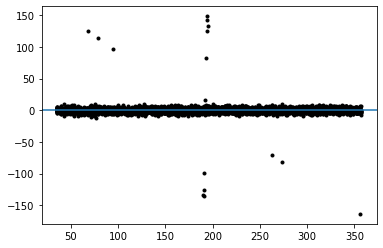

In [211]:
#Visualize the residual plot
plt.scatter(results_model2.fittedvalues, results_model2.resid, marker=".", c = "k")

# Plot the horizontal line in 0 as the fitted line
plt.axhline([0])

Plot diatas menenunjukan bahwa titik-titik data tersebar secara merata disekitar garis dan tidak ada pola tertentu dalam sebaran titiknya. Hal ini dapat disimpulkan bahwa asumsi independence of errors tidak terlanggar.

### Distribution of the errors

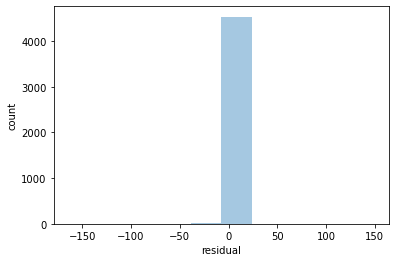

In [213]:
plt.hist(results_model2.resid, color='tab:blue', alpha=0.4)
plt.xlabel("residual")
plt.ylabel("count")

plt.show()

In [ ]:
Berdasarkan grafik di atas residual berdistribusi normal.

**Sales = 0.1816 + 3.5124 TV + 0.1311 Radio**

Nilai R squared model adalah sebesar 99.3% yang mana ini adalah nilai yang baik untuk model regresi diatas.